# Assignment 3 - Clustering

In [2]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import pandas as pd
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "06_Clustering_Images"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## Aufgabe 1

Zunächsten werden die Datein eingelesen und mit den Funktionen .info() und .head() genauer betrachtet.

In [3]:
shopping_data = pd.read_csv("03_Retail_Clustering.csv", sep=";")

shopping_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2240 non-null   int64  
 1   Education            2240 non-null   object 
 2   Marital_Status       2240 non-null   object 
 3   Estimated_Income     2216 non-null   float64
 4   Kid_home             2240 non-null   int64  
 5   Teen_home            2240 non-null   int64  
 6   Registration_date    2240 non-null   object 
 7   Recency              2240 non-null   int64  
 8   Exist_Complain       2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumWebPurchases      2240 non-null   i

In [4]:
shopping_data.head()

,Year_Birth,Education,Marital_Status,Estimated_Income,Kid_home,Teen_home,Registration_date,Recency,Exist_Complain,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
0,1957,Graduation,Single,58138.0,0,0,04.09.2020,58,0,635,88,546,172,88,88,8,10,4
1,1954,Graduation,Single,46344.0,1,1,08.03.2022,38,0,11,1,6,2,1,6,1,1,2
2,1965,Graduation,Together,71613.0,0,0,21.08.2021,26,0,426,49,127,111,21,42,8,2,10
3,1984,Graduation,Together,26646.0,1,0,10.02.2022,26,0,11,4,20,10,3,5,2,0,4
4,1981,PhD,Married,58293.0,1,0,19.01.2022,94,0,173,43,118,46,27,15,5,3,6


In [43]:
shopping_data.describe()

,Year_Birth,Estimated_Income,Kid_home,Teen_home,Recency,Exist_Complain,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,1968.820397,52247.251354,0.441787,0.505415,49.012635,0.009477,305.091606,26.356047,166.995939,37.637635,...,0.164711,0.217058,0.000903,0.001354,0.104693,0.386733,0.212545,0.258574,0.034296,0.000903
std,11.985554,25173.076661,0.536896,0.544181,28.948352,0.096907,337.327920,39.793917,224.283273,54.752082,...,0.371003,0.412335,0.030035,0.036777,0.306227,0.487112,0.409201,0.437950,0.182030,0.030035
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1959.000000,35303.000000,0.000000,0.000000,24.000000,0.000000,24.000000,2.000000,16.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1970.000000,51381.500000,0.000000,0.000000,49.000000,0.000000,174.500000,8.000000,68.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1977.000000,68522.000000,1.000000,1.000000,74.000000,0.000000,505.000000,33.000000,232.250000,50.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,1996.000000,666666.000000,2.000000,2.000000,99.000000,1.000000,1493.000000,199.000000,1725.000000,259.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Es ist zu sehen, dass einige Attribute in numerische Werte umgewandelt werden müssen und dass die Spalte Registration Date nicht mit dem Einkaufsverhalten zusammenhängt und somit entfernt werden kann.

In [5]:
shopping_data.drop('Registration_date', inplace=True, axis=1)

In [6]:
from sklearn.preprocessing import LabelEncoder

shopping_data_1 = pd.get_dummies(shopping_data, columns = ['Education'])
shopping_data_2 = pd.get_dummies(shopping_data_1, columns = ['Marital_Status'])
shopping_data = shopping_data_2

Nun werden die Daten noch auf fehlende Werte überprüft, da diese bei KMeans nicht vorhanden sein dürfen.

In [7]:
shopping_data.isna().sum()

Year_Birth                  0
Estimated_Income           24
Kid_home                    0
Teen_home                   0
Recency                     0
Exist_Complain              0
MntWines                    0
MntFruits                   0
MntMeatProducts             0
MntFishProducts             0
MntSweetProducts            0
MntGoldProds                0
NumWebPurchases             0
NumCatalogPurchases         0
NumStorePurchases           0
Education_2n Cycle          0
Education_Basic             0
Education_Graduation        0
Education_Master            0
Education_PhD               0
Marital_Status_Absurd       0
Marital_Status_Alone        0
Marital_Status_Divorced     0
Marital_Status_Married      0
Marital_Status_Single       0
Marital_Status_Together     0
Marital_Status_Widow        0
Marital_Status_YOLO         0
dtype: int64

Es ist zu sehen, dass die Spalte Estimated Income Null Werte enthält. Diese werden im nächste Schritt entfernt.

In [8]:
shopping_data = shopping_data.dropna()

Zunächst werden einige Daten visualisiert, um mögliche Cluster zu sehen - zuerst die verschiedenen Produkte die gekauft werden und das angenommene Einkommen, danach die Anzahl ein Einkäufen über die verschiedenen Kanäle.

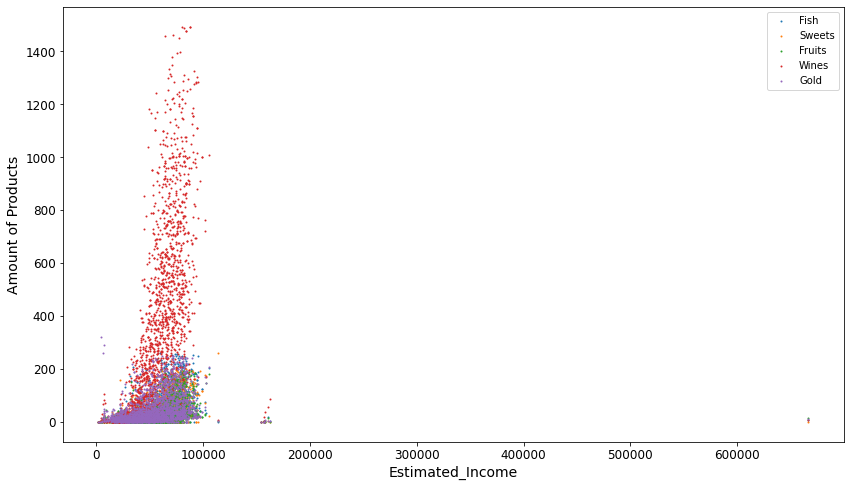

In [9]:
plt.figure(figsize=(14, 8)) 
plt.scatter(x=shopping_data["Estimated_Income"],y=shopping_data["MntFishProducts"], s=1)
plt.scatter(x=shopping_data["Estimated_Income"],y=shopping_data["MntSweetProducts"], s=1)
plt.scatter(x=shopping_data["Estimated_Income"],y=shopping_data["MntFruits"], s=1)
plt.scatter(x=shopping_data["Estimated_Income"],y=shopping_data["MntWines"], s=1)
plt.scatter(x=shopping_data["Estimated_Income"],y=shopping_data["MntGoldProds"], s=1)
classes = ['Fish', 'Sweets','Fruits','Wines','Gold']
plt.xlabel("Estimated_Income")
plt.ylabel("Amount of Products")
plt.legend(labels=classes)
plt.show()

Es ist zu sehen das sich die Anzahl an gekauften Prdoukten mit steigendem Einkommen erhöht und auch das ein Unterschied bzgl. der Waren, die gekauft werden, vorliegt. Beispielsweise bei Wein und Gold kommt es vermehrt zu Einkäufen, wenn der Einkäufer ein höheres Einkommen hat.

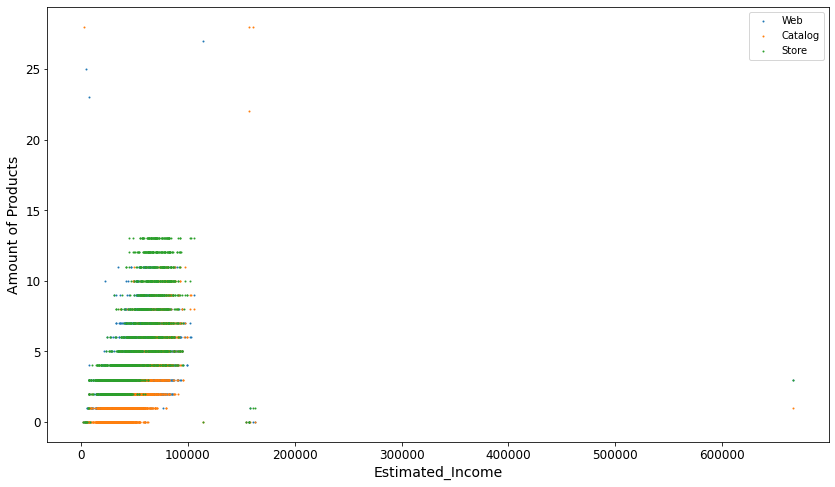

In [10]:
plt.figure(figsize=(14, 8)) 
plt.scatter(x=shopping_data["Estimated_Income"],y=shopping_data["NumWebPurchases"], s=1)
plt.scatter(x=shopping_data["Estimated_Income"],y=shopping_data["NumCatalogPurchases"], s=1)
plt.scatter(x=shopping_data["Estimated_Income"],y=shopping_data["NumStorePurchases"], s=1)
classes = ['Web', 'Catalog','Store']
plt.xlabel("Estimated_Income")
plt.ylabel("Amount of Products")
plt.legend(labels=classes)
plt.show()

Es lässt sich sehen, dass Einkäufe über den Katalog zwar weniger vorkommen, aber auch eher bei höheren Einkommen häufer erscheinen - besonders bei einer erhöhten Anzahl an Einkäufen über den Katalog. Sonst wird meist über den Laden selbst gekauft und weniger über das Web.

### kMeans

Nun wird das kmeans Model trainiert.

In [11]:
from sklearn.cluster import KMeans

k=5
kmeans = KMeans(n_clusters=k, random_state=42)
# set random state for reproducibility
y_pred = kmeans.fit_predict(shopping_data)

In [12]:
y_pred

array([0, 4, 0, ..., 0, 0, 0], dtype=int32)

In [13]:
y_pred is kmeans.labels_

True

In [14]:
kmeans.cluster_centers_

array([[1.96594196e+03, 6.28212068e+04, 2.00892857e-01, 7.20238095e-01,
        4.85982143e+01, 7.44047619e-03, 4.75211310e+02, 3.57485119e+01,
        2.05694940e+02, 5.00654762e+01, 3.57782738e+01, 6.29107143e+01,
        5.62946429e+00, 3.73065476e+00, 7.95089286e+00, 7.44047619e-02,
        4.16333634e-17, 5.07440476e-01, 1.57738095e-01, 2.60416667e-01,
        1.48809524e-03, 1.48809524e-03, 1.14583333e-01, 4.07738095e-01,
        1.77083333e-01, 2.55952381e-01, 4.16666667e-02, 6.50521303e-19],
       [1.97446087e+03, 2.33819522e+04, 7.80434783e-01, 2.06521739e-01,
        4.82695652e+01, 1.08695652e-02, 1.80173913e+01, 5.83043478e+00,
        2.16304348e+01, 8.44130435e+00, 5.76739130e+00, 1.64000000e+01,
        1.97173913e+00, 4.67391304e-01, 2.91086957e+00, 1.41304348e-01,
        1.15217391e-01, 5.15217391e-01, 1.15217391e-01, 1.13043478e-01,
        7.58941521e-19, 4.33680869e-19, 9.13043478e-02, 3.93478261e-01,
        2.41304348e-01, 2.56521739e-01, 1.73913043e-02, 7.58941

In [15]:
kmeans.inertia_

122322376308.8039

Der inertia Wert scheint relativ hoch zu sein. Im Weiteren Verlauf wird betrachtet, wo dieser nieriger wäre.

### Elbow plot

Um zu sehen, welcher K Wert besser wäre, wird ein Elbow Plot erzeugt. Dafür werden erst die entsprechenden Modelle erzeugt und danach der Plot gebildet.

In [18]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(shopping_data) for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

Saving figure inertia_vs_k_plot


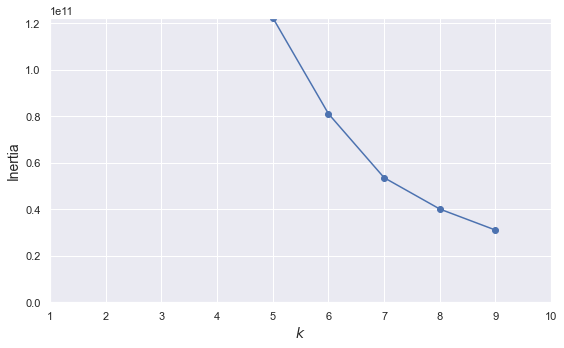

In [33]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.axis([1, 10, 0, 122322376308])
save_fig("inertia_vs_k_plot")
plt.show()

Der Plot zeigt, dass der inertias Wert sinkt mit der Anzahl an Clustern und der Ellbogen, also der Punkt an dem der inertia Wert niedriger ist, aber es noch keine zu hohe Anzahl an Clustern gibt, liegt bei 7.

### Silhouette Score

Als nächstes wird die Silhouette Methode angewandt.
Diese bewertet die Qualität von Clustern danach, wie gut jeder Punkt in einen Cluster passt.

In [20]:
from sklearn.metrics import silhouette_score

silhouette_score(shopping_data, kmeans.labels_)

0.5302804750501144

Ein Silhouette Score von 0.53  bedeutet, dass die Klassifizierung für die Datenpunkte in einer angemessenen Art und Weise durchgeführt wurde.

In [21]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(shopping_data)for k in range(1, 10)]

silhouette_scores = [silhouette_score(shopping_data, model.labels_) for model in kmeans_per_k[1:]]

Saving figure silhouette_score_vs_k_plot


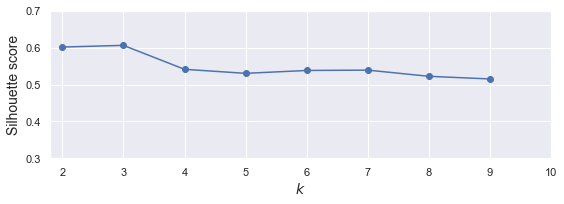

In [22]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([1.8, 10, 0.3, 0.7])
save_fig("silhouette_score_vs_k_plot")
plt.show()

Saving figure silhouette_analysis_plot


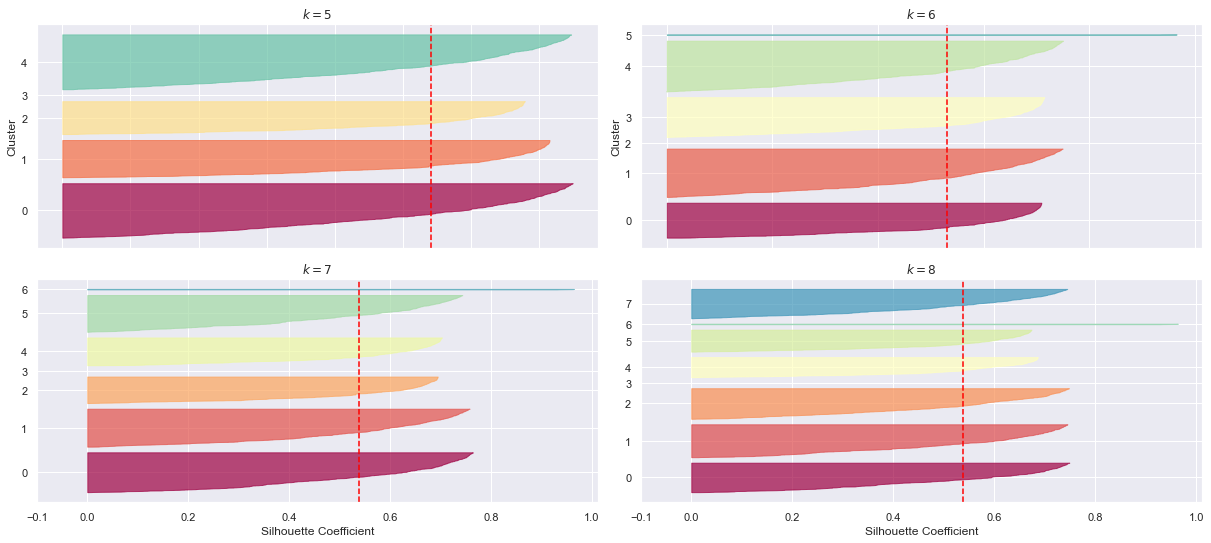

In [41]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(17, 11))
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(shopping_data)for k in range(1, 12)]

for k in (5, 6, 7, 8):
    plt.subplot(3, 2, k - 2)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(shopping_data, y_pred)

    padding = len(shopping_data) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (5, 6):
        plt.ylabel("Cluster")
    
    if k in (7, 8):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 3], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=12)

save_fig("silhouette_analysis_plot")
plt.show()

In keinem der Cluster ist der Silhouette Koeffizent niedrider als das Cluster. Das heist die Methode passt sehr gut.

## Aufgabe 2

### Heatmap

Es wird eine  Heatmap erstellt und um die Labels richtig zu setzen, werden diese zunächst aus dem Datensatz mit der Methode .values() und .tolist() extrahiert. Letztere, damit die Werte in einer Liste gespeichert sind.

In [16]:
features = shopping_data.columns.values.tolist()

<AxesSubplot:>

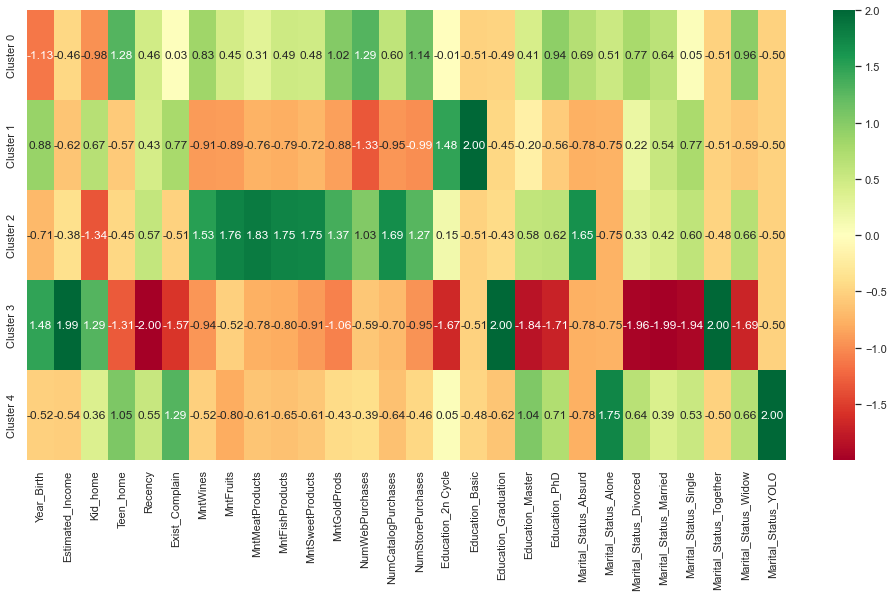

In [17]:
x_labels = features
y_labels = ["Cluster 0","Cluster 1","Cluster 2","Cluster 3", "Cluster 4"]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(kmeans.cluster_centers_)
scaledClusterCenteres = scaler.transform(kmeans.cluster_centers_)

import seaborn as sns
sns.set(rc={'figure.figsize':(17,8.27)})
sns.heatmap(scaledClusterCenteres, annot=True, fmt='.2f', cmap='RdYlGn', xticklabels=x_labels, yticklabels=y_labels)

### Analyse Cluster

Nun werden die Cluster und der orginale Datensatz mit der jeweiligen Cluster Bezeichnung zusammengeführt. Danach werden für jedes Cluster ein eigener DataFrame erstellt, damit die einzelnen Cluster besser analysiert werden können.

In [24]:
temp =pd.concat([pd.DataFrame(shopping_data),pd.DataFrame(kmeans.labels_, columns=['Cluster'])], axis=1)

In [25]:
cluster_0 = temp[temp['Cluster']==0]
cluster_1 = temp[temp['Cluster']==1]
cluster_2 = temp[temp['Cluster']==2]
cluster_3 = temp[temp['Cluster']==3]
cluster_4 = temp[temp['Cluster']==4]

In [26]:
cluster_0.describe()

,Year_Birth,Estimated_Income,Kid_home,Teen_home,Recency,Exist_Complain,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,Cluster
count,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,...,666.000000,666.0,666.0,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,672.0
mean,1969.285285,52316.866366,0.426426,0.484985,49.941441,0.012012,308.049550,27.426426,172.956456,41.351351,...,0.226727,0.0,0.0,0.088589,0.369369,0.222222,0.270270,0.048048,0.001502,0.0
std,12.178484,21884.323296,0.518666,0.543381,29.198381,0.109021,337.548128,40.602880,226.131759,59.064611,...,0.419029,0.0,0.0,0.284363,0.482997,0.416052,0.444433,0.214029,0.038749,0.0
min,1899.000000,2447.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,1960.000000,36238.000000,0.000000,0.000000,25.000000,0.000000,25.250000,2.000000,16.000000,2.250000,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,1971.000000,51352.500000,0.000000,0.000000,50.000000,0.000000,177.500000,9.500000,69.500000,13.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,1978.000000,69749.000000,1.000000,1.000000,74.000000,0.000000,493.000000,33.750000,250.000000,58.750000,...,0.000000,0.0,0.0,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.0
max,1996.000000,162397.000000,2.000000,2.000000,99.000000,1.000000,1478.000000,199.000000,1725.000000,258.000000,...,1.000000,0.0,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


In [27]:
cluster_1.describe()

,Year_Birth,Estimated_Income,Kid_home,Teen_home,Recency,Exist_Complain,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,Cluster
count,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,...,455.000000,455.000000,455.0,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,460.0
mean,1968.514286,51277.912088,0.437363,0.551648,47.705495,0.006593,299.257143,23.483516,152.380220,35.925275,...,0.206593,0.002198,0.0,0.114286,0.426374,0.186813,0.235165,0.032967,0.002198,1.0
std,12.120509,20765.925711,0.539140,0.544367,28.261154,0.081021,331.522695,36.106598,208.772441,55.000950,...,0.405307,0.046881,0.0,0.318508,0.495094,0.390191,0.424569,0.178747,0.046881,0.0
min,1893.000000,5648.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,1960.000000,35746.000000,0.000000,0.000000,24.000000,0.000000,23.000000,1.000000,15.500000,3.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
50%,1970.000000,50725.000000,0.000000,1.000000,48.000000,0.000000,167.000000,7.000000,62.000000,11.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
75%,1977.000000,65795.500000,1.000000,1.000000,72.000000,0.000000,515.500000,28.500000,187.000000,40.000000,...,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.0
max,1996.000000,156924.000000,2.000000,2.000000,99.000000,1.000000,1486.000000,194.000000,981.000000,250.000000,...,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0


In [28]:
cluster_2.describe()

,Year_Birth,Estimated_Income,Kid_home,Teen_home,Recency,Exist_Complain,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,Cluster
count,403.000000,403.000000,403.000000,403.000000,403.000000,403.000000,403.000000,403.000000,403.000000,403.000000,...,403.000000,403.0,403.000000,403.000000,403.000000,403.000000,403.000000,403.000000,403.0,406.0
mean,1968.853598,51667.568238,0.456576,0.481390,49.057072,0.009926,282.570720,27.831266,169.151365,35.302730,...,0.198511,0.0,0.004963,0.104218,0.349876,0.223325,0.287841,0.029777,0.0,2.0
std,12.269402,22659.455114,0.546336,0.529269,29.712875,0.099255,325.431886,40.489865,236.401620,52.304958,...,0.399375,0.0,0.070359,0.305923,0.477523,0.416992,0.453319,0.170182,0.0,0.0
min,1900.000000,3502.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,2.0
25%,1959.000000,34433.500000,0.000000,0.000000,23.000000,0.000000,19.000000,2.000000,14.000000,2.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,2.0
50%,1970.000000,50002.000000,0.000000,0.000000,49.000000,0.000000,152.000000,9.000000,66.000000,12.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,2.0
75%,1977.000000,67246.000000,1.000000,1.000000,75.500000,0.000000,459.000000,35.500000,260.500000,46.500000,...,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.0,2.0
max,1994.000000,160803.000000,2.000000,2.000000,99.000000,1.000000,1492.000000,184.000000,1622.000000,259.000000,...,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,2.0


In [29]:
cluster_3.describe()

,Year_Birth,Estimated_Income,Kid_home,Teen_home,Recency,Exist_Complain,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,Cluster
count,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
mean,1963.0,45146.0,1.0,1.0,28.0,0.0,33.0,0.0,5.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1963.0,45146.0,1.0,1.0,28.0,0.0,33.0,0.0,5.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0
25%,1963.0,45146.0,1.0,1.0,28.0,0.0,33.0,0.0,5.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0
50%,1963.0,45146.0,1.0,1.0,28.0,0.0,33.0,0.0,5.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0
75%,1963.0,45146.0,1.0,1.0,28.0,0.0,33.0,0.0,5.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0
max,1963.0,45146.0,1.0,1.0,28.0,0.0,33.0,0.0,5.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0


In [30]:
cluster_4.describe()

,Year_Birth,Estimated_Income,Kid_home,Teen_home,Recency,Exist_Complain,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,Cluster
count,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,...,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.0,677.0
mean,1968.464072,52454.532934,0.443114,0.508982,48.979042,0.008982,320.739521,26.588323,172.013473,37.055389,...,0.227545,0.001497,0.001497,0.115269,0.402695,0.212575,0.242515,0.023952,0.0,4.0
std,11.539005,21034.652879,0.543240,0.551604,28.816009,0.094418,349.257591,40.937510,227.529694,51.965318,...,0.419561,0.038691,0.038691,0.319586,0.490808,0.409436,0.428925,0.153015,0.0,0.0
min,1941.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,4.0
25%,1959.000000,35290.500000,0.000000,0.000000,24.000000,0.000000,26.000000,1.000000,16.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,4.0
50%,1970.000000,53137.500000,0.000000,0.000000,50.000000,0.000000,196.500000,8.000000,69.500000,13.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,4.0
75%,1977.000000,69171.000000,1.000000,1.000000,74.250000,0.000000,529.250000,33.000000,239.250000,49.250000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,4.0
max,1995.000000,157146.000000,2.000000,2.000000,99.000000,1.000000,1493.000000,194.000000,1725.000000,258.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,4.0


In allen Clustern ist sichtbar, dass das Alter nicht maßgebend ist, da es immer den gleichen Durchschnitt hat.


Merkmale, die herausstechen, sind zum einen, dass in Cluster 1 die Kunden vorallem eine Basic Education haben und auch weniger von allen Produkten einkaufen, als in den anderen Clustern.
In Cluster 3 und 4 wird auch weniger gekauft von den Kunden, dabei sind bei Cluster 3 Kunden mit Education Graduation enthalten und diese Kunden sind in Beziehungen. 
In Cluster 4 sind die Kunden eher Single oder haben den Status Yolo und dort existiert eher schon eine Beschwerde.

Des Weiteren kann gesagt werden, dass in allen Clustern bis auf Cluster 3 alle Altersklassen vertreten sind und das die Einkäufe in allen Cluster sehr stark varrieren.

## Aufgabe 3

Der Marketing Abteilung würde ich den Rat geben, mich bei den Coupons auf die Cluster 1,3 und 4 zuerst zu fokussieren, da diese weniger ausgeben für Produkte als die anderen Cluster. Dabei sind es meistens Singles, d.h. es müssten Produkte beworben werden, die sich gut für ein Essen allein eignen oder die sich gut zu Freunden mitnehmen lassen. Vielleicht sogar in Verbindung mit Online Einkäufen, das diese bei Cluster 3 und 4 bevorzugt werden.
Für die anderen Cluster eignen sich natürlich Coupons trotzdem gut, damit der Einkaufswert von diesen gesteigert wird - bei diesen Gruppen aber eher für den Store direkt.